In [0]:
!pip install shap
!pip install importlib
!pip install lifelines
!pip install plotly

In [2]:
from google.colab import auth
from google.colab import drive
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', -1)

auth.authenticate_user()
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!git clone https://github.com/gowun/MedicalDataScience.git

Cloning into 'MedicalDataScience'...
remote: Enumerating objects: 248, done.
remote: Counting objects: 100% (248/248), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 248 (delta 115), reused 221 (delta 88), pack-reused 0
Receiving objects: 100% (248/248), 941.20 KiB | 2.25 MiB/s, done.
Resolving deltas: 100% (115/115), done.


In [4]:
%cd MedicalDataScience/
!git pull
%cd ..

/content/MedicalDataScience
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 4 (delta 2), reused 4 (delta 2), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/gowun/MedicalDataScience
   ca6c353..6097ef0  master     -> origin/master
Updating ca6c353..6097ef0
Fast-forward
 BladderCancer_Cho/BladderCancer_Cho.py | 4 ++--
 1 file changed, 2 insertions(+), 2 deletions(-)
/content


In [3]:
from MedicalDataScience.BladderCancer_Cho.BladderCancer_Cho import BladderCander

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
a = BladderCander()

In [5]:
a.Xy[0].head()

,1973 WHO grade,Age,CK14 H-score,CK14 IRS scoring system,CK14 Percent,CK20 H-score,CK20 IRS scoring system,CK20 Percent,CK5/6 H-score,CK5/6 IRS scoring system,CK5/6 Percent,FOXA1 H-score,FOXA1 IRS scoring system,FOXA1 Percent,GATA3 H-score,GATA3 IRS scoring system,GATA3 Percent,Gender,Grade,Sum_variant,IUC,IUC_InSitu,Glandular,Lymphoma-like,Sarcomatoid,Micropapillary,Giant,Squamous,Nested,Others
0,3,69,0.000000,0,0.000000,0.000000,0,0.000000,23.333333,2,13.333333,53.333333,1,33.333333,200.000000,2,100.000000,1,3,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,3,72,4.000000,1,1.333333,0.000000,0,0.000000,260.000000,3,86.666667,0.000000,0,0.000000,136.666667,2,68.333333,0,3,3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,3,69,20.000000,0,6.666667,0.000000,0,0.000000,0.000000,0,0.000000,5.000000,0,5.000000,0.000000,0,0.000000,1,3,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,76,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,300.000000,3,100.000000,1,3,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,77,33.333333,2,25.000000,16.666667,1,13.333333,0.000000,0,0.000000,0.000000,0,0.000000,300.000000,3,100.000000,1,3,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
a.Xy[0].describe()

,1973 WHO grade,Age,CK14 H-score,CK14 IRS scoring system,CK14 Percent,CK20 H-score,CK20 IRS scoring system,CK20 Percent,CK5/6 H-score,CK5/6 IRS scoring system,CK5/6 Percent,FOXA1 H-score,FOXA1 IRS scoring system,FOXA1 Percent,GATA3 H-score,GATA3 IRS scoring system,GATA3 Percent,Gender,Grade,Sum_variant,IUC,IUC_InSitu,Glandular,Lymphoma-like,Sarcomatoid,Micropapillary,Giant,Squamous,Nested,Others
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.0,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,2.956044,69.153846,36.189560,0.703297,12.602564,57.787546,1.109890,26.989011,44.321429,0.956044,19.809524,34.798535,0.670330,24.294872,225.952381,2.494505,85.293040,0.780220,3.0,1.153846,0.395604,0.604396,0.120879,0.065934,0.065934,0.208791,0.373626,0.230769,0.054945,0.021978
std,0.206133,10.835049,73.941503,0.960260,25.022284,70.961831,1.026867,29.255102,72.582375,1.031849,30.141104,48.830037,0.803533,28.300614,98.146760,0.861183,28.440531,0.416392,0.0,0.855350,0.491689,0.491689,0.327793,0.249542,0.249542,0.408697,0.486446,0.423659,0.229135,0.147424
min,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,61.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,183.333333,2.000000,87.500000,1.000000,3.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,71.000000,1.000000,0.000000,0.666667,30.000000,1.000000,15.000000,5.333333,1.000000,2.666667,13.333333,0.000000,13.333333,300.000000,3.000000,100.000000,1.000000,3.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,77.000000,20.166667,1.000000,7.166667,93.333333,2.000000,53.333333,56.666667,2.000000,27.500000,63.333333,1.000000,44.166667,300.000000,3.000000,100.000000,1.000000,3.0,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,3.000000,87.000000,300.000000,3.000000,100.000000,300.000000,3.000000,100.000000,300.000000,3.000000,100.000000,240.000000,3.000000,100.000000,300.000000,3.000000,100.000000,1.000000,3.0,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
a.durations.describe()

,OS_initial diagnosis(M),OS_chemo start,PFS_surgery
count,91.000000,91.000000,91.000000
mean,31.384615,30.560440,26.626374
std,19.072825,19.044514,18.889532
min,4.000000,4.000000,1.000000
25%,17.000000,16.000000,13.000000
50%,27.000000,27.000000,23.000000
75%,41.500000,40.500000,35.500000
max,103.000000,102.000000,95.000000


In [8]:
a.event

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0])

In [9]:
a.logistic_regression

{'coefficients':            feature  coefficient
 0                  -0.489207   
 1   Nested         -1.153361   
 2   Age            -0.190528   
 3   1973 WHO grade  0.766769   
 4   Gender         -0.184440   
 5   Giant           0.638181   
 6   Sum_variant    -0.620344   
 7   Sarcomatoid    -0.271782   
 8   CK5/6 Percent  -0.571387   
 9   CK20 Percent    0.422838   
 10  FOXA1 Percent   0.471057   ,
 'columns': Index(['Nested', 'Age', '1973 WHO grade', 'Gender', 'Giant', 'Sum_variant',
        'Sarcomatoid', 'CK5/6 Percent', 'CK20 Percent', 'FOXA1 Percent'],
       dtype='object'),
 'model': LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=10, multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=1234, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 'performance': {'AUC': 0.7321083172147002,
  'accuracy'

In [10]:
a.decision_tree

{'columns': Index(['Nested', 'Age', '1973 WHO grade', 'Gender', 'Giant', 'Sum_variant',
        'Sarcomatoid', 'CK14 IRS scoring system', 'CK20 IRS scoring system'],
       dtype='object'),
 'feature importance':                    feature  importance
 1  Age                      0.446357  
 0  Nested                   0.180733  
 4  Giant                    0.143979  
 8  CK20 IRS scoring system  0.136577  
 7  CK14 IRS scoring system  0.092356  ,
 'model': DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=4,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1648, min_samples_split=2747,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1234, splitter='best'),
 'model_score': 5.687143759449343,
 'performance': {'AUC': 0.8065800242699528,
  'accuracy': 0.72468,
  'f1': 0.75706

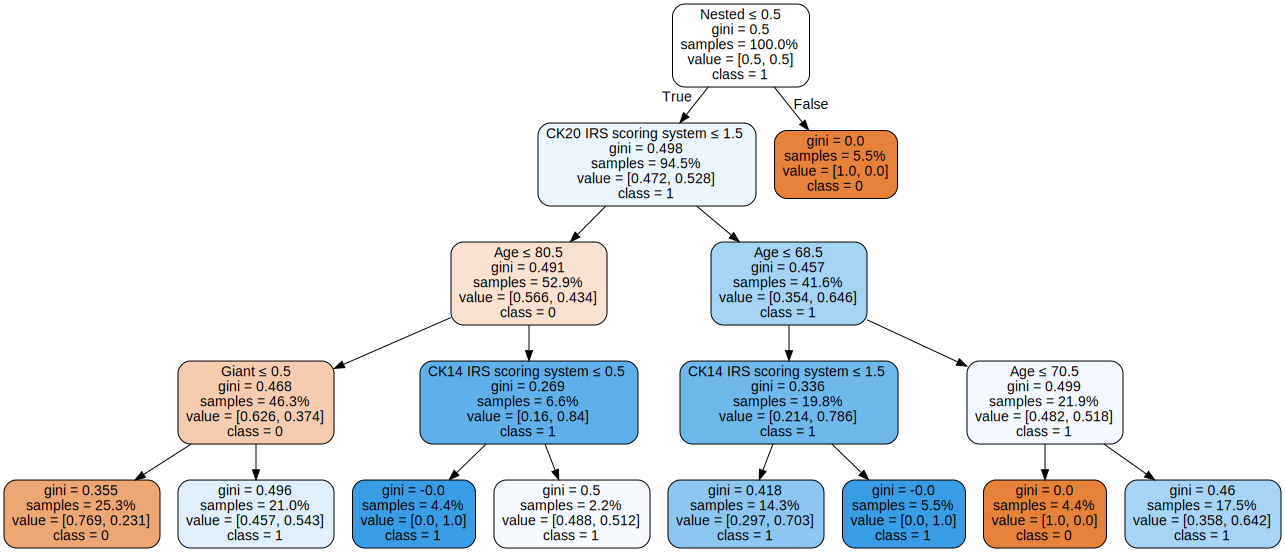

In [11]:
a.decision_tree['tree graph']

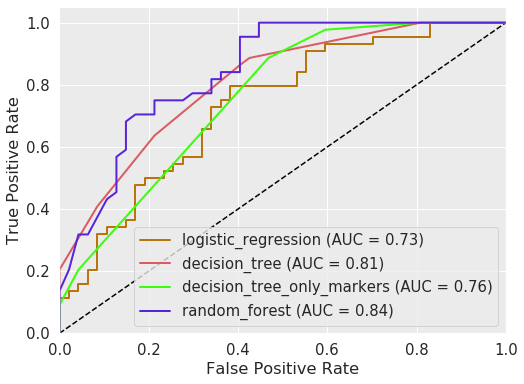

In [17]:
a.compare_auces(*a.Xy)

{'AUC': 0.7321083172147002, 'accuracy': 0.7032967032967034, 'precision': 0.660377358490566, 'recall': 0.7954545454545454, 'f1': 0.7216494845360825, 'mcc': 0.41796896026170766, 'R2': 0.13856367390042457}


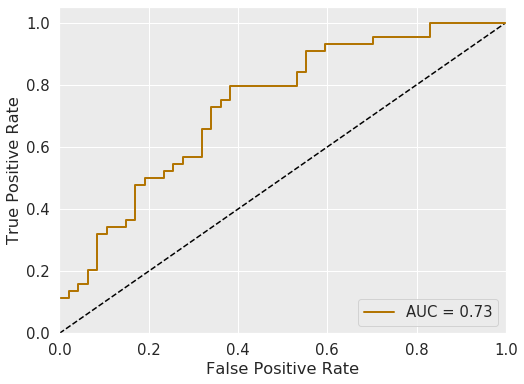

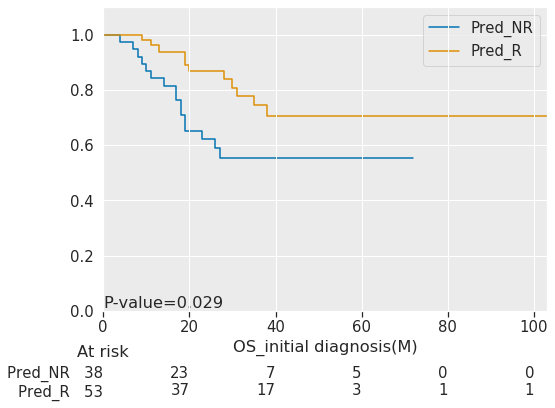

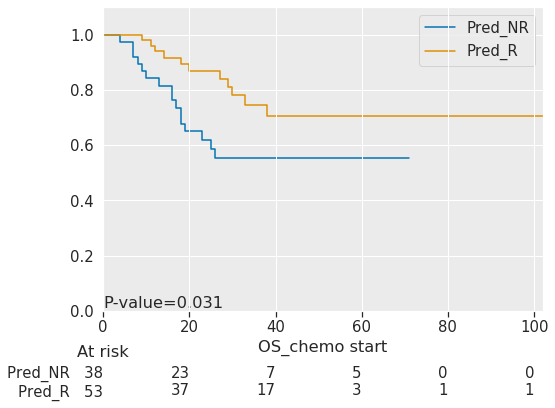

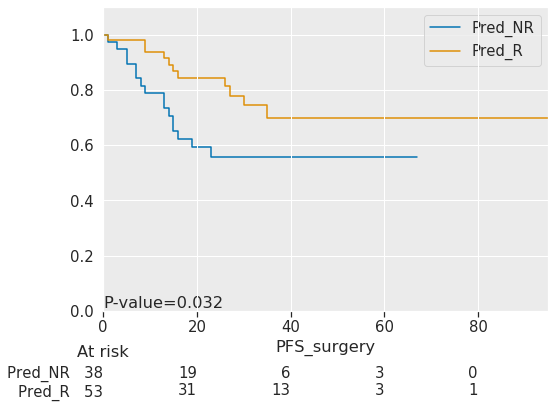

{'AUC': 0.7321083172147002,
 'R2': 0.13856367390042457,
 'accuracy': 0.7032967032967034,
 'f1': 0.7216494845360825,
 'mcc': 0.41796896026170766,
 'precision': 0.660377358490566,
 'recall': 0.7954545454545454}

In [19]:
args = ['logistic_regression'] + a.Xy + [a.durations, a.event]
a.do_validation(*args)

{'AUC': 0.8077852998065763, 'accuracy': 0.7252747252747253, 'precision': 0.6610169491525424, 'recall': 0.8863636363636364, 'f1': 0.7572815533980584, 'mcc': 0.4822993076079789, 'R2': 0.30980572628571323}


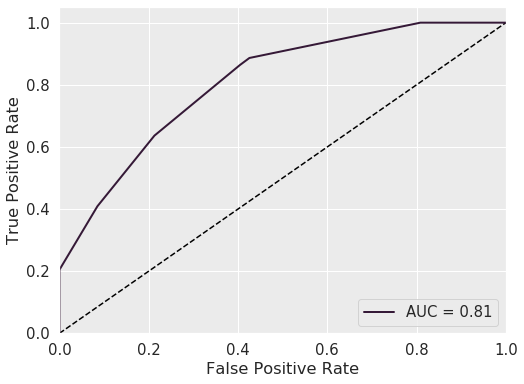

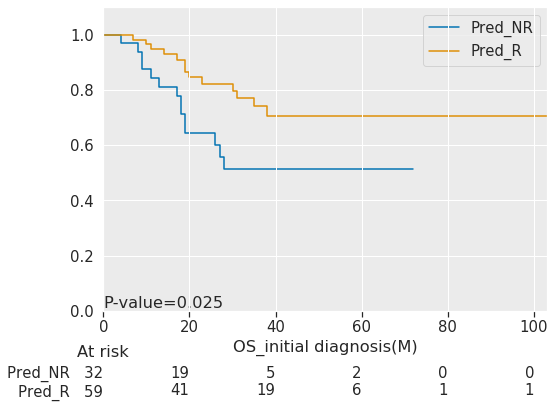

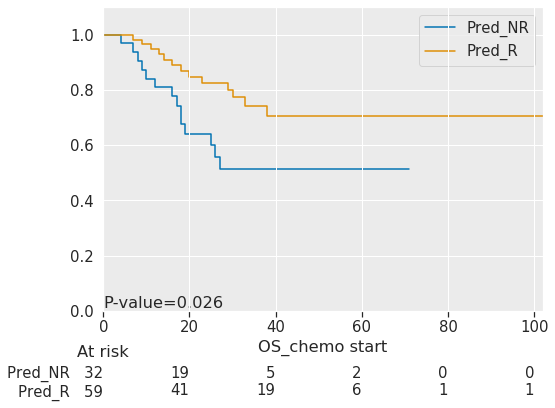

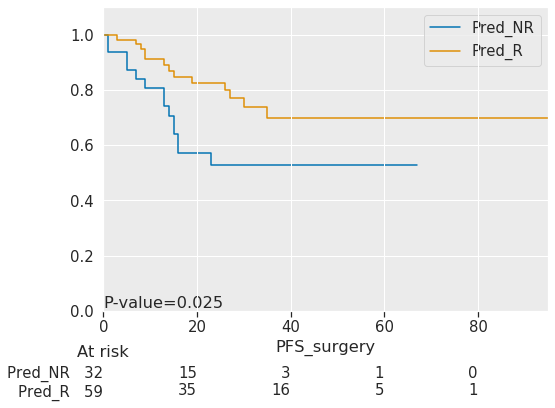

{'AUC': 0.8077852998065763,
 'R2': 0.30980572628571323,
 'accuracy': 0.7252747252747253,
 'f1': 0.7572815533980584,
 'mcc': 0.4822993076079789,
 'precision': 0.6610169491525424,
 'recall': 0.8863636363636364}

In [21]:
args[0] = 'decision_tree'
a.do_validation(*args)

{'AUC': 0.7591876208897486, 'accuracy': 0.7032967032967034, 'precision': 0.639344262295082, 'recall': 0.8863636363636364, 'f1': 0.742857142857143, 'mcc': 0.44464692718408083, 'R2': 0.2627057064395679}


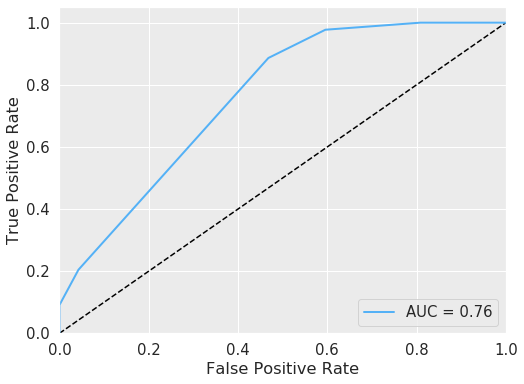

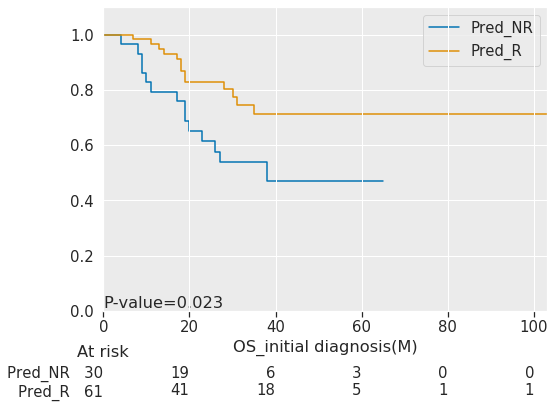

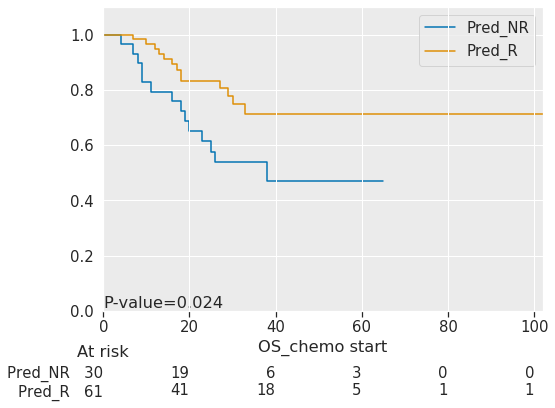

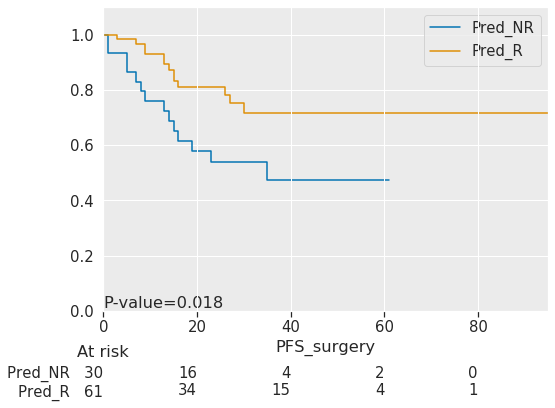

{'AUC': 0.7591876208897486,
 'R2': 0.2627057064395679,
 'accuracy': 0.7032967032967034,
 'f1': 0.742857142857143,
 'mcc': 0.44464692718408083,
 'precision': 0.639344262295082,
 'recall': 0.8863636363636364}

In [22]:
args[0] = 'decision_tree_only_markers'
a.do_validation(*args)

{'AUC': 0.8423597678916829, 'accuracy': 0.7252747252747253, 'precision': 0.6727272727272727, 'recall': 0.8409090909090909, 'f1': 0.7474747474747475, 'mcc': 0.4679959736224316, 'R2': 0.29916514415399265}


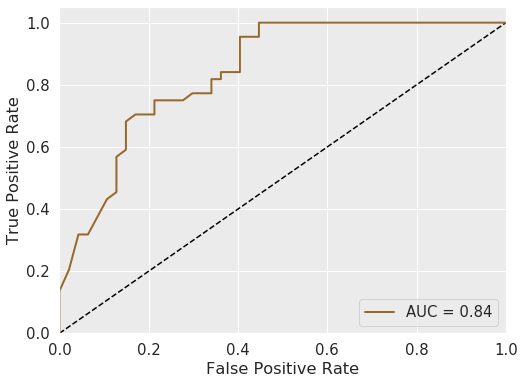

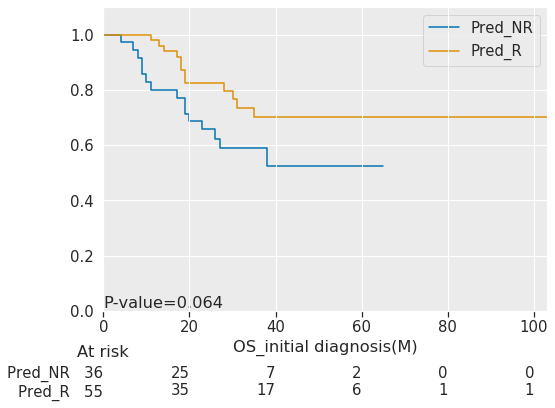

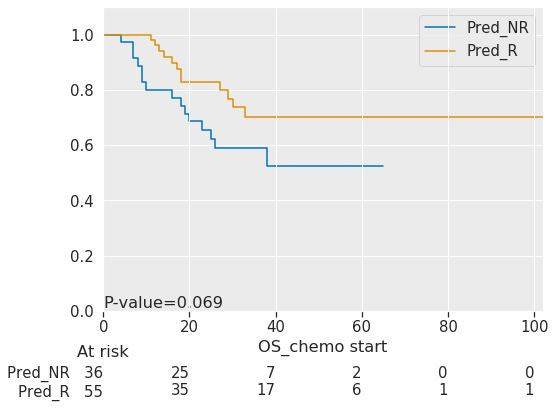

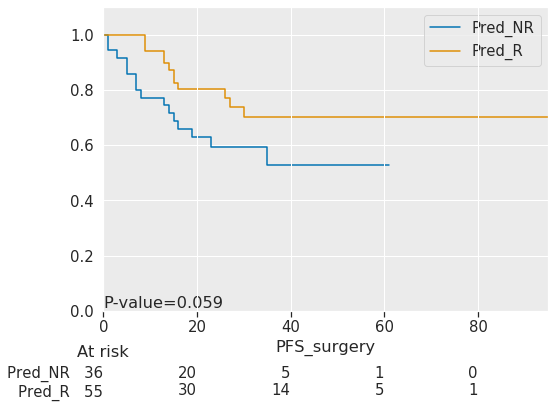

{'AUC': 0.8423597678916829,
 'R2': 0.29916514415399265,
 'accuracy': 0.7252747252747253,
 'f1': 0.7474747474747475,
 'mcc': 0.4679959736224316,
 'precision': 0.6727272727272727,
 'recall': 0.8409090909090909}

In [24]:
args[0] = 'random_forest'
a.do_validation(*args)

In [26]:
dts = a.do_yourself_decision_tree()
len(dts)

{'AUC': 0.7532905618110176, 'accuracy': 0.72391, 'precision': 0.6662734157034675, 'recall': 0.8622596352232401, 'f1': 0.7517019956292214, 'mcc': 0.4713522210855669, 'R2': 0.2692015344644636}
{'AUC': 0.7071273437387244, 'accuracy': 0.69271, 'precision': 0.6119928785181257, 'recall': 1.0, 'f1': 0.7592997297614851, 'mcc': 0.49704724357937236, 'R2': 0.2471136108758808}
{'AUC': 0.7164991292609418, 'accuracy': 0.70335, 'precision': 0.6203268785276388, 'recall': 1.0, 'f1': 0.7656811557570635, 'mcc': 0.5130579282336758, 'R2': 0.26308401971719075}
{'AUC': 0.7532905618110176, 'accuracy': 0.72391, 'precision': 0.6662734157034675, 'recall': 0.8622596352232401, 'f1': 0.7517019956292214, 'mcc': 0.4713522210855669, 'R2': 0.2692015344644636}
{'AUC': 0.7532905618110176, 'accuracy': 0.72391, 'precision': 0.6662734157034675, 'recall': 0.8622596352232401, 'f1': 0.7517019956292214, 'mcc': 0.4713522210855669, 'R2': 0.2692015344644636}
{'AUC': 0.7164991292609418, 'accuracy': 0.70335, 'precision': 0.620326878

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/content/MedicalDataScience/modeling_tools/tree_modeling.py:161: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/content/MedicalDataScience/modeling_tools/tree_modeling.py:185: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/content/MedicalDataScience/modeling_tools/tree_modeling.py:191: SettingWithCopyWarning:


A value is tryi

19
    model_score
10  5.687144   
7   5.687144   
8   5.687144   
9   5.687144   
11  5.687144   
12  5.687144   
2   5.256630   
13  3.412286   
15  3.412286   
3   2.628315   
5   2.628315   
4   2.274858   
6   2.274858   
14  2.274858   
16  2.010877   
17  2.010877   
0   2.010877   
1   2.010877   
19  2.010877   


19

In [29]:
mk_dts = a.do_yourself_decision_tree_only_markers()
len(mk_dts)

{'AUC': 0.7582792206117909, 'accuracy': 0.70259, 'precision': 0.6398184234496558, 'recall': 0.8840472064042255, 'f1': 0.7423616344846106, 'mcc': 0.4420072277793459, 'R2': 0.26103223590313085}
{'AUC': 0.7404443074240751, 'accuracy': 0.64913, 'precision': 0.5823030839822366, 'recall': 0.9766443839234134, 'f1': 0.7295987176226696, 'mcc': 0.40717623290820354, 'R2': 0.22541078811156035}
{'AUC': 0.7107194482409153, 'accuracy': 0.67069, 'precision': 0.64717249218528, 'recall': 0.70481554840307, 'f1': 0.6747651921424551, 'mcc': 0.3437815116273009, 'R2': 0.18494330602883735}
{'AUC': 0.7749025841850978, 'accuracy': 0.72509, 'precision': 0.6469121622568039, 'recall': 0.9528967566229265, 'f1': 0.7706426610824205, 'mcc': 0.5128171796044181, 'R2': 0.294718571798838}
{'AUC': 0.7565809026145512, 'accuracy': 0.72443, 'precision': 0.6613876668982017, 'recall': 0.8840472064042255, 'f1': 0.7566775273061199, 'mcc': 0.47958183974396834, 'R2': 0.27128595189667726}
{'AUC': 0.7366696903773552, 'accuracy': 0.69

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/content/MedicalDataScience/modeling_tools/tree_modeling.py:180: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/content/MedicalDataScience/modeling_tools/tree_modeling.py:185: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/content/MedicalDataScience/modeling_tools/tree_modeling.py:191: SettingWithCopyWarning:


A value is tryi

15
    model_score
0   7.845272   
2   5.256630   
3   5.256630   
5   5.106335   
9   5.027192   
15  5.027192   
20  4.567916   
13  4.549715   
6   4.021754   
14  4.021754   
19  3.610290   
1   3.131707   
8   2.274858   
16  2.274858   
10  2.274858   


15

In [30]:
lrs = a.do_yourself_logistic_regression()
len(lrs)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logis

{'AUC': 0.7176015473887815, 'accuracy': 0.6373626373626373, 'precision': 0.6, 'recall': 0.75, 'f1': 0.6666666666666665, 'mcc': 0.2881115655986036, 'R2': 0.13787334481098013}
{'AUC': 0.6963249516441006, 'accuracy': 0.6483516483516484, 'precision': 0.603448275862069, 'recall': 0.7954545454545454, 'f1': 0.6862745098039215, 'mcc': 0.318168716560019, 'R2': 0.12869009474665805}
{'AUC': 0.6919729206963249, 'accuracy': 0.6373626373626373, 'precision': 0.6, 'recall': 0.75, 'f1': 0.6666666666666665, 'mcc': 0.2881115655986036, 'R2': 0.12696867161185843}
{'AUC': 0.7142166344294004, 'accuracy': 0.6373626373626373, 'precision': 0.5964912280701754, 'recall': 0.7727272727272727, 'f1': 0.6732673267326733, 'mcc': 0.2927153264137874, 'R2': 0.13785800512843094}
{'AUC': 0.7272727272727272, 'accuracy': 0.6593406593406593, 'precision': 0.6181818181818182, 'recall': 0.7727272727272727, 'f1': 0.6868686868686869, 'mcc': 0.3330826676045606, 'R2': 0.1388608281527458}
{'AUC': 0.695357833655706, 'accuracy': 0.63736

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logis

11

In [31]:
rf = a.do_yourself_random_forest()
rf

{'AUC': 0.8408268593274745, 'accuracy': 0.72466, 'precision': 0.6730025453704009, 'recall': 0.8401006849880334, 'f1': 0.7473249518216023, 'mcc': 0.4663731933740169, 'R2': 0.297952731945633}


{'columns': Index(['1973 WHO grade', 'Age', 'CK14 H-score', 'CK14 IRS scoring system',
        'CK14 Percent', 'CK20 H-score', 'CK20 IRS scoring system',
        'CK20 Percent', 'CK5/6 H-score', 'CK5/6 IRS scoring system',
        'CK5/6 Percent', 'FOXA1 H-score', 'FOXA1 IRS scoring system',
        'FOXA1 Percent', 'GATA3 H-score', 'GATA3 IRS scoring system',
        'GATA3 Percent', 'Gender', 'Grade', 'Sum_variant', 'IUC', 'IUC_InSitu',
        'Glandular', 'Lymphoma-like', 'Sarcomatoid', 'Micropapillary', 'Giant',
        'Squamous', 'Nested', 'Others'],
       dtype='object'),
 'feature importance':                      feature  importance
 8   CK5/6 H-score             0.330240  
 28  Nested                    0.206278  
 3   CK14 IRS scoring system   0.139354  
 5   CK20 H-score              0.112888  
 7   CK20 Percent              0.102113  
 1   Age                       0.021441  
 10  CK5/6 Percent             0.017863  
 0   1973 WHO grade            0.016264  
 13  FOXA1 P